In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Google Trends Score Analysis

Success for an actor can also be seen as the fact that people are talking about him or her a lot. One way of estimating this is to see whether an actor's name is highly searched on the Internet. This can be done using the Google Trends service.

One of the main difficulties with this approach is managing to extract data from Google for a hundred thousand actors.

This method also suffers from certain biases. For example, an actor's name may be highly searched on the Internet for reasons unrelated to his or her acting career. As the film industry has existed since long before the Google search service was introduced, older actors find themselves disavowed by this assessment. It should also be pointed out that Google is not the only browser, so people who use other ones are under-represented in this rating.

Please note that this database is not yet complete. It contains data from only 100 of the 135761 different actors in the character.metadata.tsv database. This is due to the fact that the scraping of google trends data takes a considerable amount of time, and has therefore not yet been finalized.

In [2]:
trends = pd.read_csv("./Data/googletrends_actor_partial_database.csv")

In [3]:
display(trends)

,Actor name,Freebase actor ID,Trends score
0,Tom Cruise,/m/07r1h,1000000.000000
1,Jason Statham,/m/034hyc,354927.007299
2,Ice Cube,/m/01vw26l,309306.569343
3,Albert Hall,/m/01lntp,85310.218978
4,Willem Dafoe,/m/01f7dd,74817.518248
...,...,...,...
95,Mikhail Zharov,/m/07m08h,0.000000
96,Mikhail Dzhagofarov,/m/0g4_nbq,0.000000
97,Yvan Kyrlya,/m/05zqdwf,0.000000
98,James Kayten,/m/0g98dwd,0.000000


These data correspond to internet searches using Google during the last 12 months.

The trends score unit is completely arbitrary and does not correspond to any material reality. As Google only provides data without units, we have arbitrarily scaled the results between 0 and 1 000 000.

Google sends relative values between actors, and with fairly low precision (integer values from 0 to 100). So if a player has more than 100 times fewer searches than all the other players already evaluated, Google returns a value of 0, which explains the zero values here. This is a problem that will be corrected by studying all the actors, as it is highly unlikely that, out of hundreds of thousands of actors, we could have one isolated from the others by a factor of 100.

In our analysis here, these zero values are due to a lack of precision, so we've chosen to remove them.

In [4]:
trends_without_null = trends.loc[trends.loc[:, "Trends score"] > 0, :].copy()
display(trends_without_null)

,Actor name,Freebase actor ID,Trends score
0,Tom Cruise,/m/07r1h,1000000.000000
1,Jason Statham,/m/034hyc,354927.007299
2,Ice Cube,/m/01vw26l,309306.569343
3,Albert Hall,/m/01lntp,85310.218978
4,Willem Dafoe,/m/01f7dd,74817.518248
...,...,...,...
78,Hildy Brooks,/m/0gc9cpb,62.543360
79,Julia Granstrom,/m/08w75d,46.477176
80,Natasha Slayton,/m/026zpch,46.477176
81,J. Patrick McCormack,/m/03z8yd9,41.886838


/home/elongos/miniconda3/envs/ada-epfl/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/elongos/miniconda3/envs/ada-epfl/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


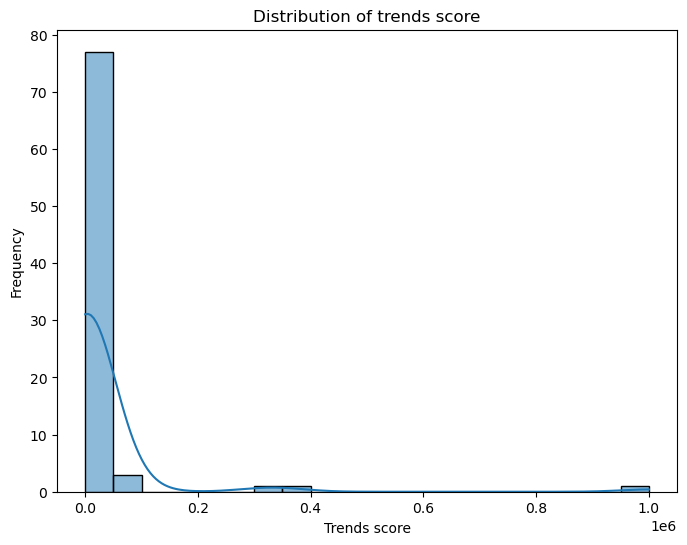

In [5]:
plt.figure(figsize=(8, 6))
sns.histplot(data=trends_without_null, x="Trends score", kde=True, bins=20)
plt.xlabel('Trends score')
plt.ylabel('Frequency')
plt.title('Distribution of trends score')
plt.show()

In [6]:
trends_without_null["Log trends score"] = trends_without_null["Trends score"].apply(lambda x: np.log(x))
display(trends_without_null)

,Actor name,Freebase actor ID,Trends score,Log trends score
0,Tom Cruise,/m/07r1h,1000000.000000,13.815511
1,Jason Statham,/m/034hyc,354927.007299,12.779667
2,Ice Cube,/m/01vw26l,309306.569343,12.642088
3,Albert Hall,/m/01lntp,85310.218978,11.354050
4,Willem Dafoe,/m/01f7dd,74817.518248,11.222807
...,...,...,...,...
78,Hildy Brooks,/m/0gc9cpb,62.543360,4.135860
79,Julia Granstrom,/m/08w75d,46.477176,3.838961
80,Natasha Slayton,/m/026zpch,46.477176,3.838961
81,J. Patrick McCormack,/m/03z8yd9,41.886838,3.734972


/home/elongos/miniconda3/envs/ada-epfl/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/elongos/miniconda3/envs/ada-epfl/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


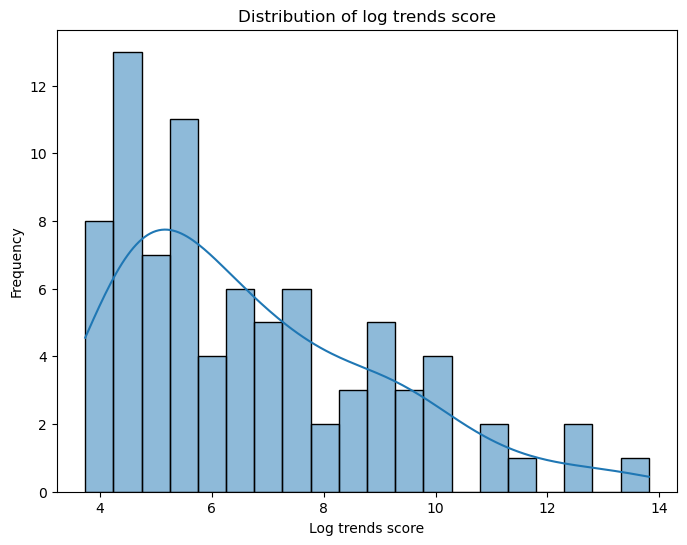

In [7]:
plt.figure(figsize=(8, 6))
sns.histplot(data=trends_without_null, x="Log trends score", kde=True, bins=20)
plt.xlabel('Log trends score')
plt.ylabel('Frequency')
plt.title('Distribution of log trends score')
plt.show()